In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df= pd.read_csv('aps_failure_training_set1.csv',na_values='na')

In [3]:
df.shape

(36188, 171)

In [4]:
for i in df.columns:
    print(f" {i} is having {df[i].isnull().sum()} null values")

 class is having 0 null values
 aa_000 is having 0 null values
 ab_000 is having 27896 null values
 ac_000 is having 2141 null values
 ad_000 is having 9200 null values
 ae_000 is having 1587 null values
 af_000 is having 1587 null values
 ag_000 is having 379 null values
 ag_001 is having 379 null values
 ag_002 is having 379 null values
 ag_003 is having 379 null values
 ag_004 is having 379 null values
 ag_005 is having 379 null values
 ag_006 is having 379 null values
 ag_007 is having 379 null values
 ag_008 is having 379 null values
 ag_009 is having 379 null values
 ah_000 is having 382 null values
 ai_000 is having 375 null values
 aj_000 is having 375 null values
 ak_000 is having 2783 null values
 al_000 is having 382 null values
 am_0 is having 375 null values
 an_000 is having 382 null values
 ao_000 is having 345 null values
 ap_000 is having 382 null values
 aq_000 is having 345 null values
 ar_000 is having 1729 null values
 as_000 is having 375 null values
 at_000 is ha

In [5]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

In [6]:
df['class'].unique()

array(['pos', 'neg'], dtype=object)

In [7]:
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [8]:
df['class']=df['class'].map({'neg':0,'pos':1})

In [9]:
df['class'].value_counts()

0    35188
1     1000
Name: class, dtype: int64

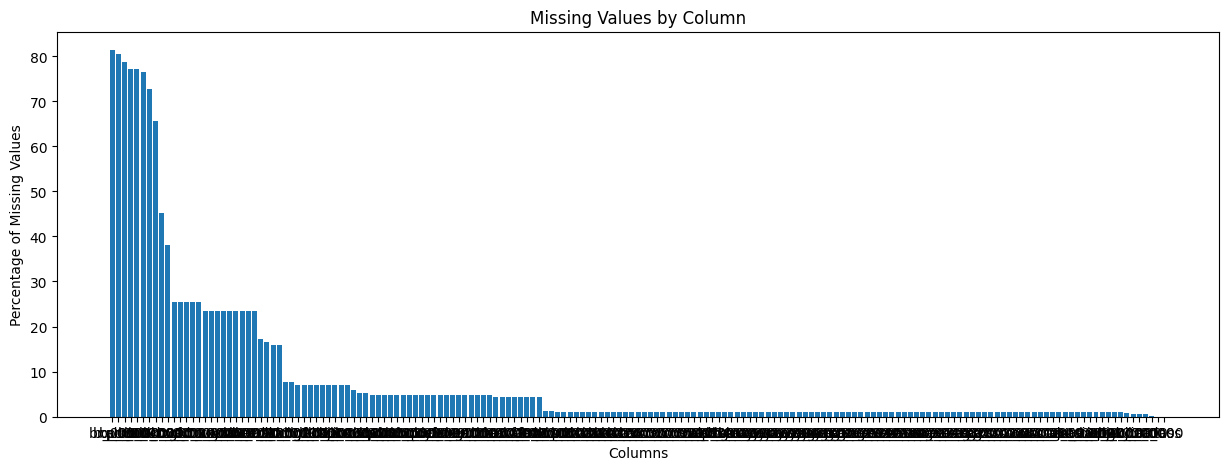

In [10]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

#missing dataframe is created which contains columns with its percentage missing values as values
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

#it is used to form a bar plot
ax.bar(missing.index, missing.values.T[0])
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Missing Values by Column')
plt.show()

# Description
     df.isna()              # Check for missing values, returns a DataFrame of boolean values
    .sum()             # Sum the missing values for each column
    .div(df.shape[0])  # Divide the sums by the total number of rows in the DataFrame
    .mul(100)          # Multiply by 100 to get the percentage
    .to_frame()        # Convert the result to a DataFrame
    .sort_values(by=0, ascending=False)  # Sort the DataFrame by the percentage of missing values in descending order


In [11]:
drop_= missing[missing.values > 70]

In [12]:
drop_.index

Index(['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000'], dtype='object')

In [13]:
df.drop(list(drop_.index), axis=1, inplace=True)

In [14]:
df.shape

(36188, 164)

#output class is highly imbalanced (smote + tomek)

#    Step 2: Choose a minority class sample
        |
        V
  # Step 3: Find k nearest neighbors
        |
        V
  # Step 4: Generate synthetic samples
        |
        V
  # Step 5: Repeat the process
        |
        V
 #  Step 1: Identify pairs of instances
        |
        V
  # Step 2: Measure distance between pairs
        |
        V
  # Step 3: Identify Tomek links


**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.


In [15]:
def total_cost(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [16]:
# numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# plt.figure(figsize=(15, 100))
# for i, col in enumerate(numeric_features):
#     plt.subplot(60, 3, i+1)
#     sns.distplot(x=df[col], color='indianred')
#     plt.xlabel(col, weight='bold')
#     plt.tight_layout()

In [17]:
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore")
%matplotlib inline

In [18]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [19]:
def evaluate_models(X, y, models):
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    cost_list=[]
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])

    return report

**Tomek Links:**
- Tomek links are pairs of instances from different classes that are very close to each other. These pairs represent examples that are potentially outliers or noisy samples. The removal of instances involved in Tomek links can help in better separating the classes and improving the performance of the classifier.

**Why Robust Scaler and not Minmax?**
- because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [20]:
# Splitting X and y for all Experiments
X= df.drop('class', axis=1)
y = df['class']

robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [21]:
results=[]

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
stratified_kfold = StratifiedKFold(n_splits=5)
strategies = [str(i) for i in [1,3,5]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.7314)
n_neighbors= 3 || accuracy (0.7234)
n_neighbors= 5 || accuracy (0.7428)


In [22]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [23]:
X_knn =knn_pipeline.fit_transform(X)

 **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.

 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

 - To add new data of minority class
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.

 - To remove the tomek links of the majority class
 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [24]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [25]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [26]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9928
- F1 score: 0.9928
- Precision: 0.9894
- Recall: 0.9963
- Roc Auc Score: 0.9928
- COST: 13750.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9871
- F1 score: 0.9872
- Precision: 0.9823
- Recall: 0.9920
- Roc Auc Score: 0.9871
- COST: 29250.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9839
- F1 score: 0.9840
- Precision: 0.9803
- Recall: 0.9876
- Roc Auc Score: 0.9839
- COST: 179060.
----------------------------------
Model performance for Test set
- Accuracy: 0.9843
- F1 score: 0.9844
- Precision: 0.9811
- Recall: 0.9876
- Roc Auc

In [27]:
report_knn

,Model Name,Cost
5,XGBClassifier,5460
0,Random Forest,13750
1,Decision Tree,29250
4,K-Neighbors Classifier,39850
2,Gradient Boosting,44830
6,AdaBoost Classifier,83290
3,Logistic Regression,297660


In [28]:
pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00


In [29]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  save_all_iterations=True,
  random_state=1989
)# Run the MICE algorithm for 3 iterations kernel.mice(3)

In [30]:
pip install miceforest

In [31]:
X_mice = kernel.complete_data()

In [32]:
# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

X_mice= mice_pipeline.fit_transform(X_mice)
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)
report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9918
- F1 score: 0.9919
- Precision: 0.9875
- Recall: 0.9963
- Roc Auc Score: 0.9918
- COST: 13890.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9820
- F1 score: 0.9821
- Precision: 0.9776
- Recall: 0.9866
- Roc Auc Score: 0.9819
- COST: 48590.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9854
- F1 score: 0.9854
- Precision: 0.9825
- Recall: 0.9884
- Roc Auc Score: 0.9854
- COST: 166940.
----------------------------------
Model performance for Test set
- Accuracy: 0.9814
- F1 score: 0.9815
- Precision: 0.9772
- Recall: 0.9859
- Roc Auc

In [33]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])
X_const =constant_pipeline.fit_transform(X)
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)


In [34]:
# training the models
report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9929
- F1 score: 0.9929
- Precision: 0.9893
- Recall: 0.9966
- Roc Auc Score: 0.9929
- COST: 12760.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9880
- F1 score: 0.9881
- Precision: 0.9819
- Recall: 0.9943
- Roc Auc Score: 0.9879
- COST: 21290.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9830
- F1 score: 0.9830
- Precision: 0.9803
- Recall: 0.9857
- Roc Auc Score: 0.9830
- COST: 205550.
----------------------------------
Model performance for Test set
- Accuracy: 0.9806
- F1 score: 0.9807
- Precision: 0.9770
- Recall: 0.9845
- Roc Auc